Accuracy: 1.0
Confusion Matrix:
[[14  0]
 [ 0 16]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



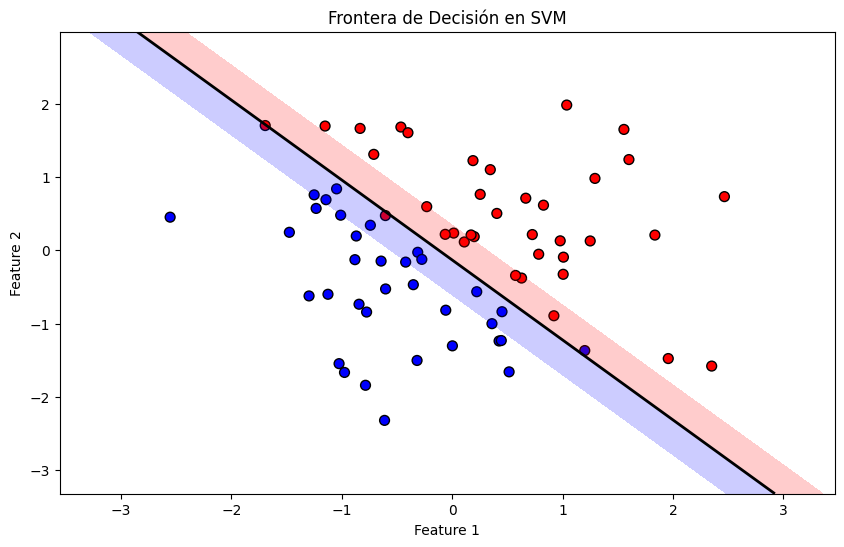

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

# Generar datos de ejemplo
np.random.seed(0)
n_samples = 100
X = np.random.randn(n_samples, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)  # La clase depende de la suma de las dos características

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear y entrenar el modelo SVM
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)

# Hacer predicciones
y_pred = svm.predict(X_test)
y_pred_prob = svm.predict_proba(X_test)[:, 1]

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Crear un grid de valores para graficar la frontera de decisión
xx, yy = np.meshgrid(np.linspace(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 200),
                     np.linspace(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
probs = svm.decision_function(grid).reshape(xx.shape)

# Graficar los datos y la frontera de decisión
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolor='k', s=50)
plt.contour(xx, yy, probs, levels=[0], linewidths=2, colors='black')
plt.contourf(xx, yy, probs, levels=[-1, 0, 1], alpha=0.2, colors=['blue', 'red'])

plt.title('Frontera de Decisión en SVM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

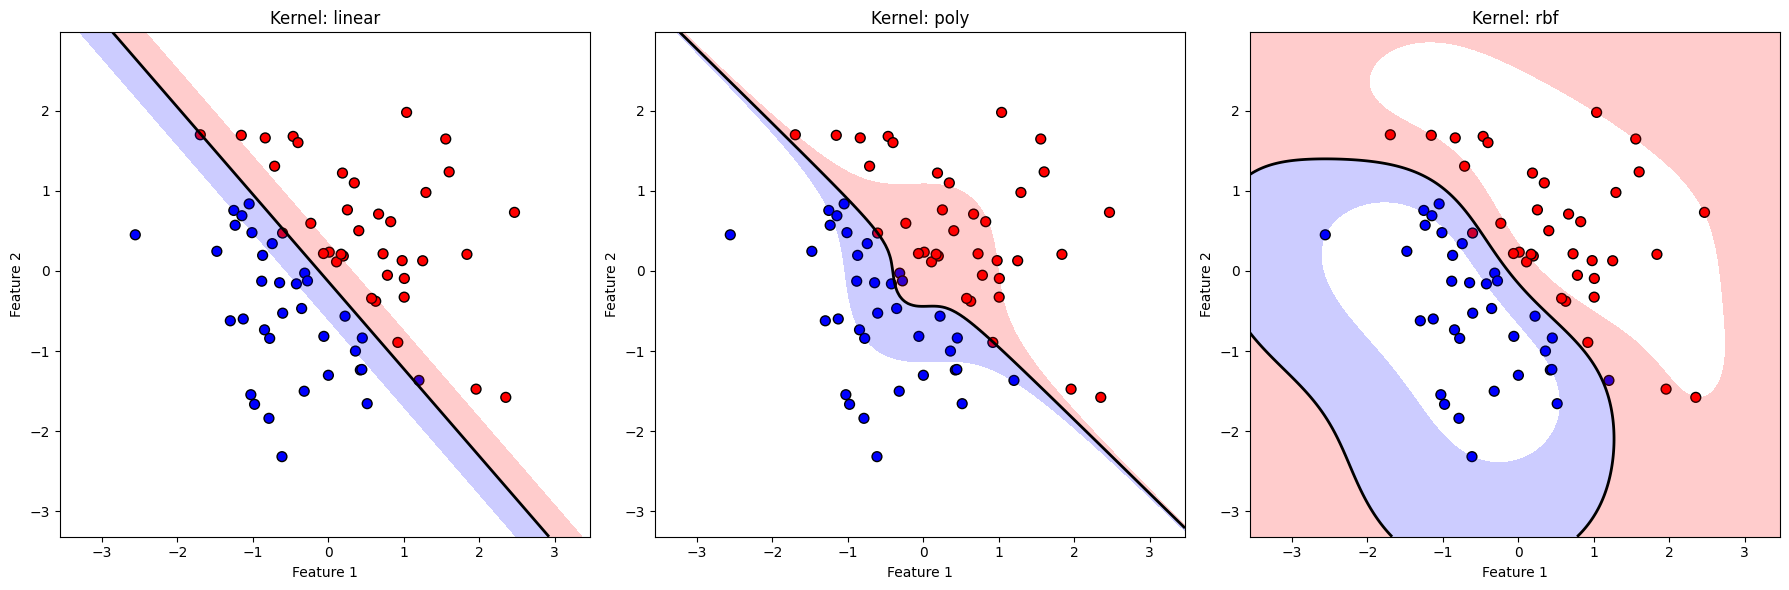

Accuracy: 0.9666666666666667
Confusion Matrix:
[[14  0]
 [ 1 15]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.94      0.97        16

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Generar datos de ejemplo
np.random.seed(0)
n_samples = 100
X = np.random.randn(n_samples, 2)
y = (X[:, 0] + X[:, 1] > 0).astype(int)  # La clase depende de la suma de las dos características

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir los kernels a usar
kernels = ['linear', 'poly', 'rbf']

# Graficar los datos y las fronteras de decisión para cada kernel
plt.figure(figsize=(18, 6))

for i, kernel in enumerate(kernels):
    svm = SVC(kernel=kernel, probability=True)
    svm.fit(X_train, y_train)

    # Crear un grid de valores para graficar la frontera de decisión
    xx, yy = np.meshgrid(np.linspace(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 200),
                         np.linspace(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = svm.decision_function(grid).reshape(xx.shape)

    # Graficar los datos y la frontera de decisión
    plt.subplot(1, 3, i+1)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', edgecolor='k', s=50)
    plt.contour(xx, yy, probs, levels=[0], linewidths=2, colors='black')
    plt.contourf(xx, yy, probs, levels=[-1, 0, 1], alpha=0.2, colors=['blue', 'red'])
    plt.title(f'Kernel: {kernel}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Evaluación del modelo con el kernel RBF
svm_rbf = SVC(kernel='rbf', probability=True)
svm_rbf.fit(X_train, y_train)

# Hacer predicciones
y_pred = svm_rbf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)